# Biodiversity in National Parks

## Project Scope

#### Problem Understanding
There are endagered species and we require to understand the conservation status of these animals.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

#### Goals
Share insights to the National Park Service by performing analysis to their data.
This work will intend to share insight about which endangered species should be prioritized by the National Park Service in order to protect their conservation.

Here are a few questions that this project will answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?


#### Data
We have access to data about different species and their conservation status and data from recorded sightings of different species at several national parks for the past 7 days.

#### Analysis
In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 


## Loading the Data from the csv files

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

#loading the csv files into a pandas dataframe
species_info = pd.read_csv("species_info.csv")
#printing some general information about the dataframe
print(species_info.info())
#showing the first rows of the dataframe to visualize the data
species_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [2]:
# Filling all NA values for species in their conservation_status that have no danger  
species_info.fillna('No Intervention', inplace=True)

In [3]:
#loading the csv files into a pandas dataframe
observations = pd.read_csv("observations.csv")
#printing some general information about the dataframe
print(observations.info())
#showing the first rows of the dataframe to visualize the data
observations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Insights:
From the species info dataframe we can see that by the non-null count there are only 191 species that have a conservation status. These are the species that we are going to focus on in order to get insights on their relationships with other variables.
Regarding the observations dataframe there are 23296 entries for the number of observations of a specific species in a specific park.

# Exploring and Explaining Data

### Species

No Intervention       0.967205
Species of Concern    0.027644
Endangered            0.002747
Threatened            0.001717
In Recovery           0.000687
Name: conservation_status, dtype: float64


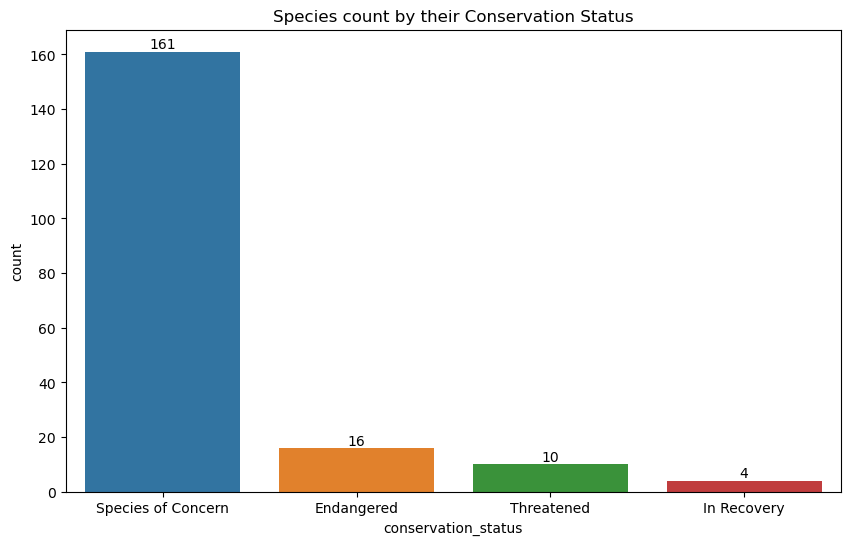

In [4]:
#getting the value proportions of endangered animals and their conservation status
print(species_info.conservation_status.value_counts(normalize=True))

#plotting a bar chart for conservation status

plt.figure(figsize=(10,6))
ax = sns.countplot(data=species_info[species_info.conservation_status != "No Intervention"], x = "conservation_status")
plt.title("Species count by their Conservation Status")

# Add counts above each bar
for container in ax.containers:
    ax.bar_label(container)


plt.show()
plt.close()

In [5]:
# summarzing the conservation and category variables

conservationCategory_prop = species_info[species_info.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory_prop

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


#### Insights:
Almost 85% of the species that are in danger are species of concern. While there are only 2% of the species in recovery.

### What is the distribution of conservation status for species?

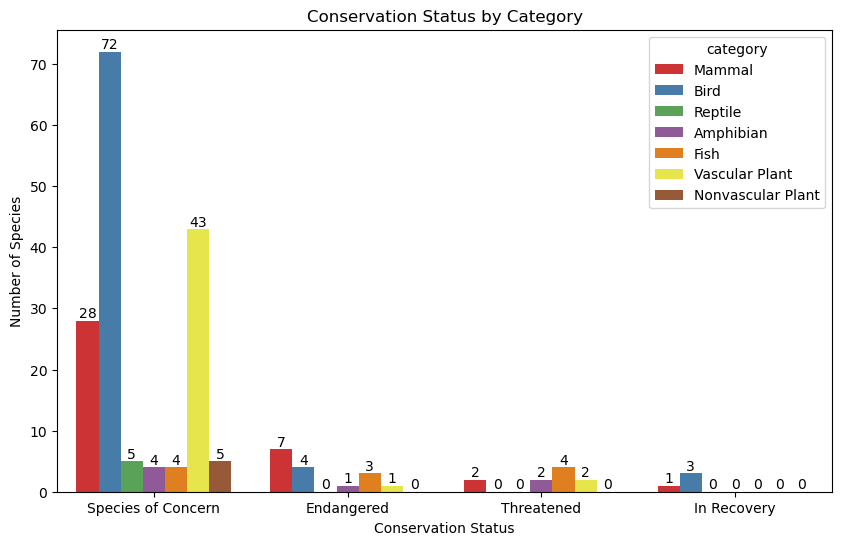

In [6]:
# Plot the distribution of species by conservation status (excluding 'No Intervention")
plt.figure(figsize=(10,6))
ax = sns.countplot(data = species_info[species_info.conservation_status != "No Intervention"],
                   x='conservation_status',
                   hue='category',
                   palette='Set1')

plt.xlabel("Conservation Status")
plt.ylabel("Number of Species")
plt.title("Conservation Status by Category")

# Add counts above each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()

#### Insights:

Birds are the species with the most animals in Recovery and also the species with most species of concern. Mammals are the species that have more endagered species.


### Observations

In [7]:
print("There are {} National Parks. These are: {}".format(observations.park_name.nunique(),observations.park_name.unique()))

There are 4 National Parks. These are: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


### Are certain types of species more likely to be endangered?

In [8]:
# Create a new column labelled 'protected'

species_info["is_protected"] = species_info.conservation_status != "No Intervention"

# Create pivot table to the prop and frequency of species that are protected and not.
protected_counts = species_info.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()

protected_counts.columns = ["category", "not_protected", "protected"]

protected_counts["% Protected"]= round((protected_counts["protected"] / (protected_counts["protected"] + protected_counts["not_protected"]))*100,2)

#sorting the protected_counts dataframe
sorted_protected_counts = protected_counts.sort_values(by=["% Protected"], ascending=False)
sorted_protected_counts


,category,not_protected,protected,% Protected
3,Mammal,146,30,17.05
1,Bird,413,75,15.37
0,Amphibian,72,7,8.86
2,Fish,115,11,8.73
5,Reptile,73,5,6.41
4,Nonvascular Plant,328,5,1.50
6,Vascular Plant,4216,46,1.08


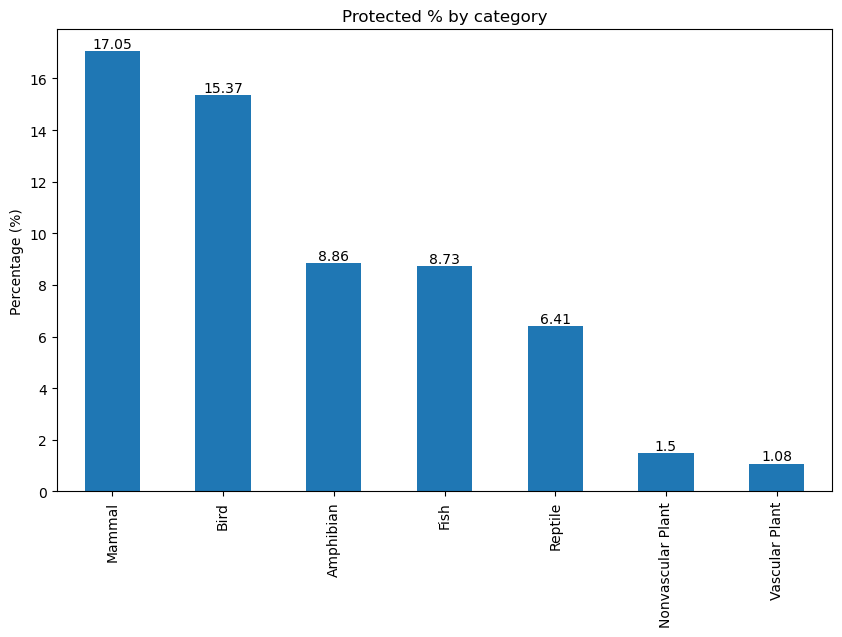

In [9]:
#plotting a bar chart for conservation status

plt.figure(figsize=(10,6))
ax = sorted_protected_counts["% Protected"].plot.bar()
plt.title("Protected % by category")
plt.ylabel("Percentage (%)")
ax.set_xticklabels(sorted_protected_counts.category)

# Add counts above each bar
for container in ax.containers:
    ax.bar_label(container)


plt.show()
plt.close()

#### Insights:

From the pivot table above we see that Mammals and Birds are the species that are more likely to be endagered. In tis case we can see that both of these living beings have more than 15% of their species in a protected status in order to avoid extinction.

### Are the differences between species and their conservation status significant?

In [10]:
from scipy.stats import chi2_contingency

# Creating a contingency table of Mammals to summarize category - protected variables
category_protection_freq = protected_counts[["category","protected", "not_protected"]]

#creating the contingency table filled with the correct numbers for mammals and amphibians.

contingency_mammals_amphibian = [[30, 146],
                                 [7, 72]]

chi2_contingency(contingency_mammals_amphibian)

Chi2ContingencyResult(statistic=2.321746712946015, pvalue=0.12757669693198975, dof=1, expected_freq=array([[ 25.5372549, 150.4627451],
       [ 11.4627451,  67.5372549]]))

In [11]:
#creating the contingency table filled with the correct numbers for mammals and vascular plants

contingency_mammals_reptile = [[30, 146],
                               [5, 73]]

chi2_contingency(contingency_mammals_reptile)


Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

In [12]:
#creating the contingency table filled with the correct numbers for mammals and vascular plants

contingency_mammals_birds = [[30, 146],
                          [75, 413]]

chi2_contingency(contingency_mammals_birds)


Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

#### Insights:

From the chi2 tests that we have perform we can get the following insights taking into account the hyphotesis:

- Null Hypothesis: There is no relation between species and their conservation_status.
- Alternate Hypothesis: There is a significant relation between species and their conservation_status.

Taking this into account and the resulting pvalues of each teast we can take the following conclusions:

- With a pvalue of significantly lower than 0.05 we acept the Null Hyphothesis for Mammals-Amphibian. This indicates these  variables are independent of one another, and our Null Hypothesis holds true. Mammals are shown to have a statistically significant higher rate of needed protection compared with Amphibian.

- With a pvalue of significantly lower than 0.05 we acept the Null Hyphothesis for Mammals-Reptiles. This indicates these  variables are independent of one another, and our Null Hypothesis holds true. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles.

- With a pvalue of significantly greater than 0.05 we reject the Null Hyphothesis for Mammals-Birds. This indicates these  variables are dependent of one another, and our Null Hypothesis is not true. Mammals are shown to have a statistically equal rate of needed protection compared with Birds.

### Which animal is most prevalent and what is their distribution amongst parks?

In [13]:
#dropping duplicates
science_name_category =species_info.drop_duplicates(subset = ["scientific_name"])

#dropping the columns that will not be jused for analysis
science_name_category = science_name_category.drop(["common_names", "conservation_status"], axis = 1)

#printing some general information about the dataframe
print(science_name_category.info())
#showing the first rows of the dataframe to visualize the data
science_name_category.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         5541 non-null   object
 1   scientific_name  5541 non-null   object
 2   is_protected     5541 non-null   bool  
dtypes: bool(1), object(2)
memory usage: 135.3+ KB
None


,category,scientific_name,is_protected
0,Mammal,Clethrionomys gapperi gapperi,False
1,Mammal,Bos bison,False
2,Mammal,Bos taurus,False
3,Mammal,Ovis aries,False
4,Mammal,Cervus elaphus,False


In [14]:
#merging the dataframe we created with the observations datafram in order to plot the data
observations_2 = observations.merge(science_name_category)

#printing some general information about the dataframe
print(observations_2.info())
#showing the first rows of the dataframe to visualize the data
observations_2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23296 entries, 0 to 23295
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
 3   category         23296 non-null  object
 4   is_protected     23296 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 932.8+ KB
None


,scientific_name,park_name,observations,category,is_protected
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,False
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,False
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,False
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,False
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,False


In [45]:
# gathering the sum of observations by park and category 

count_per_park = observations_2.groupby(["park_name", "category", "is_protected"]).sum("observations").reset_index()

count_per_park

,park_name,category,is_protected,observations
0,Bryce National Park,Amphibian,False,6882
1,Bryce National Park,Amphibian,True,498
2,Bryce National Park,Bird,False,44721
3,Bryce National Park,Bird,True,6926
4,Bryce National Park,Fish,False,11856
5,Bryce National Park,Fish,True,567
6,Bryce National Park,Mammal,False,17513
7,Bryce National Park,Mammal,True,3037
8,Bryce National Park,Nonvascular Plant,False,32506
9,Bryce National Park,Nonvascular Plant,True,486


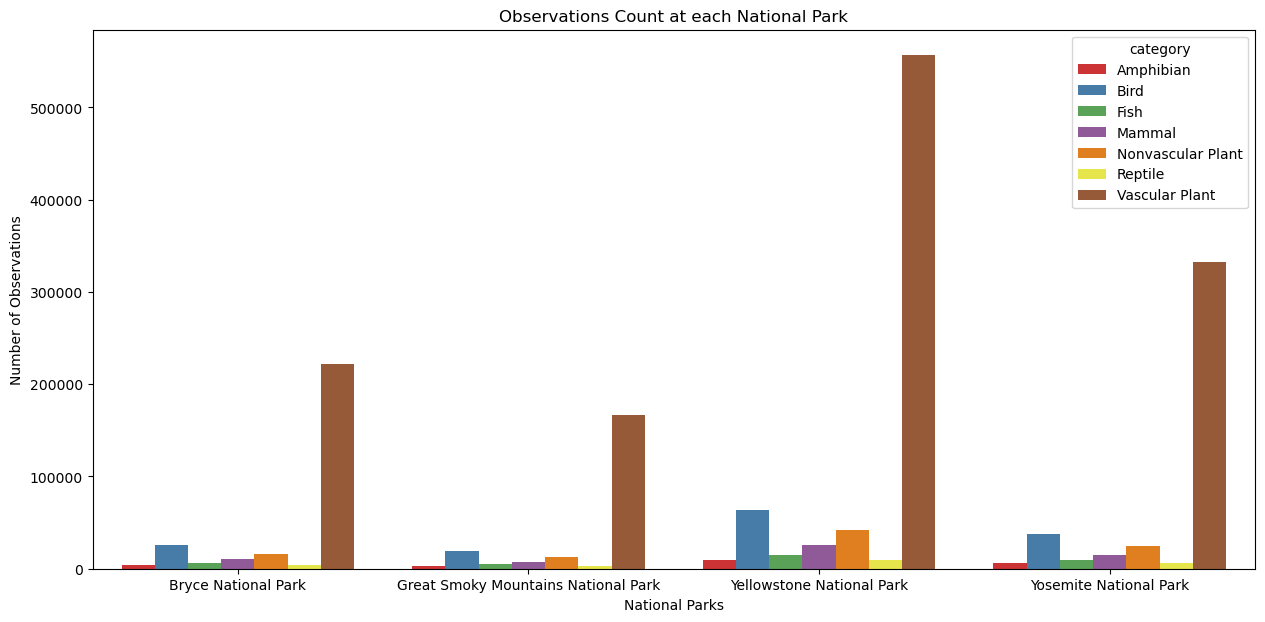

In [46]:
#plotting a bar chart for the observations by park

plt.figure(figsize=(15,7))
ax = sns.barplot(data= count_per_park, x = "park_name", y = "observations", hue= "category", palette='Set1', errorbar=None)
plt.title("Observations Count at each National Park")
plt.xlabel("National Parks")
plt.ylabel("Number of Observations")
plt.show()
plt.close()

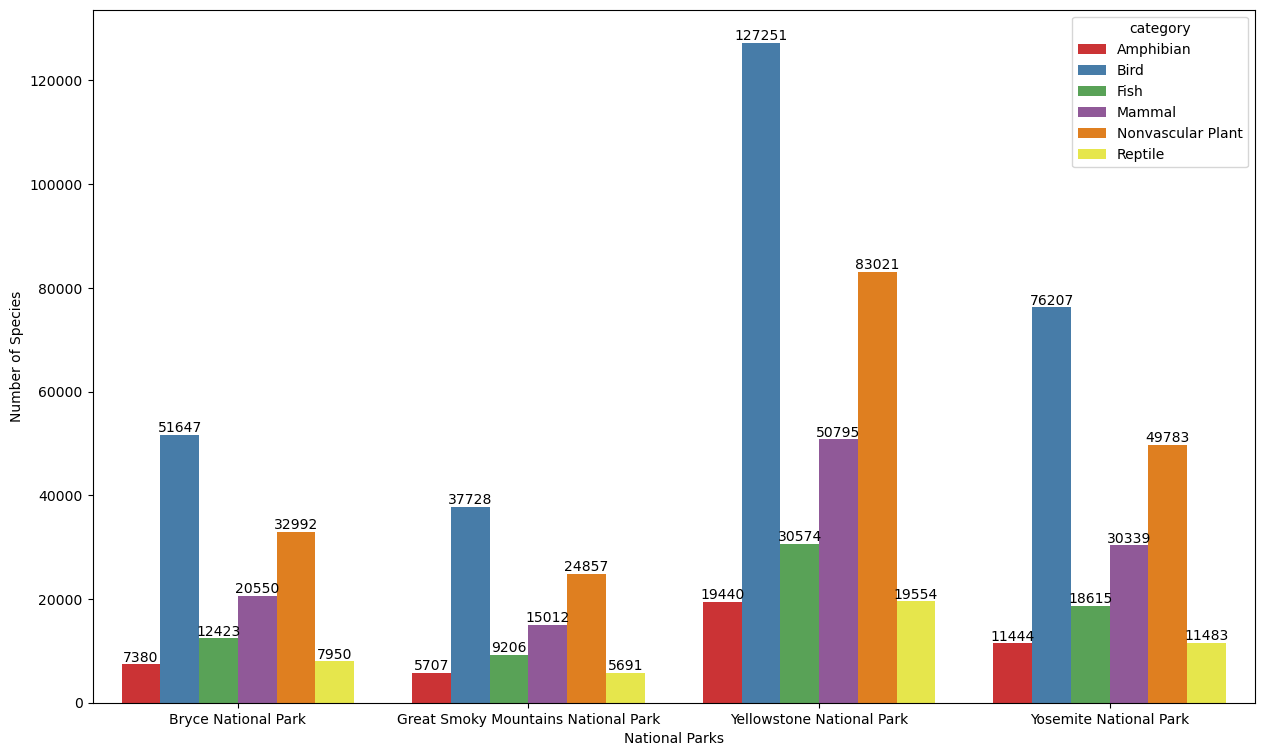

In [33]:
# dropping the vascular plant species in order to analyze better the other data

plt.figure(figsize=(15,9))
ax = sns.barplot(data = count_per_park[count_per_park.category != "Vascular Plant"],
                 x='park_name',
                 y = "observations",
                 hue='category',
                 palette='Set1',
                 errorbar=None)
plt.title("Observations Count at each National Park")

# Add counts above each bar
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("National Parks")
plt.ylabel("Number of Observations")
plt.show()
plt.close()

#### Insights:

The Bird category is the next species that was spotted the most at each national park, followed then by Nonvascular Plant. Yellow Stone appears to have the most observations of each species when compared to the other national parks.

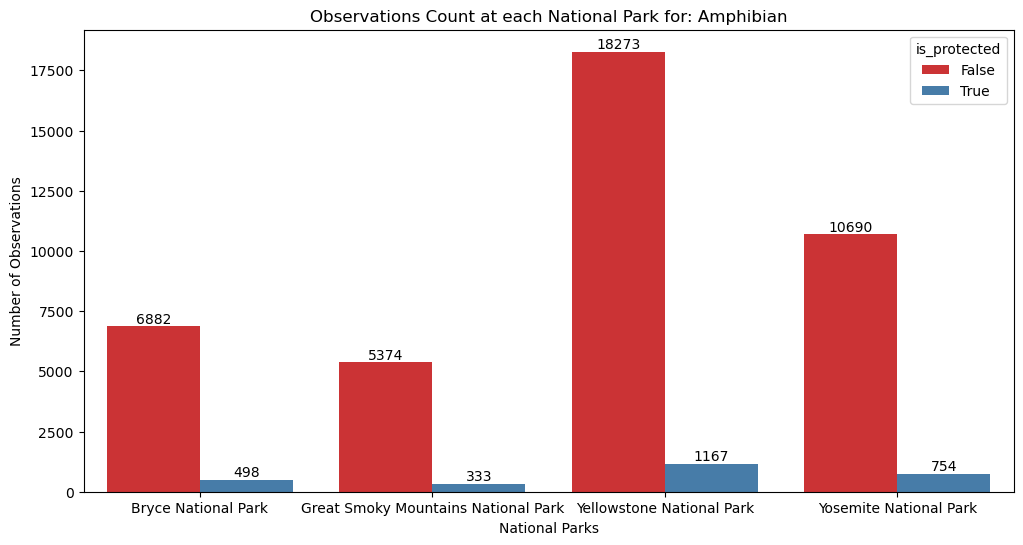

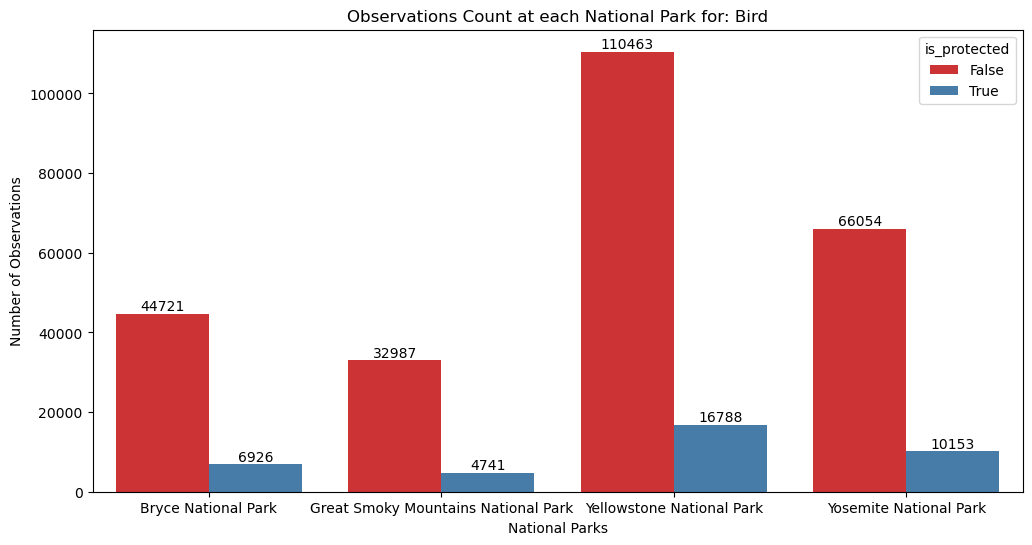

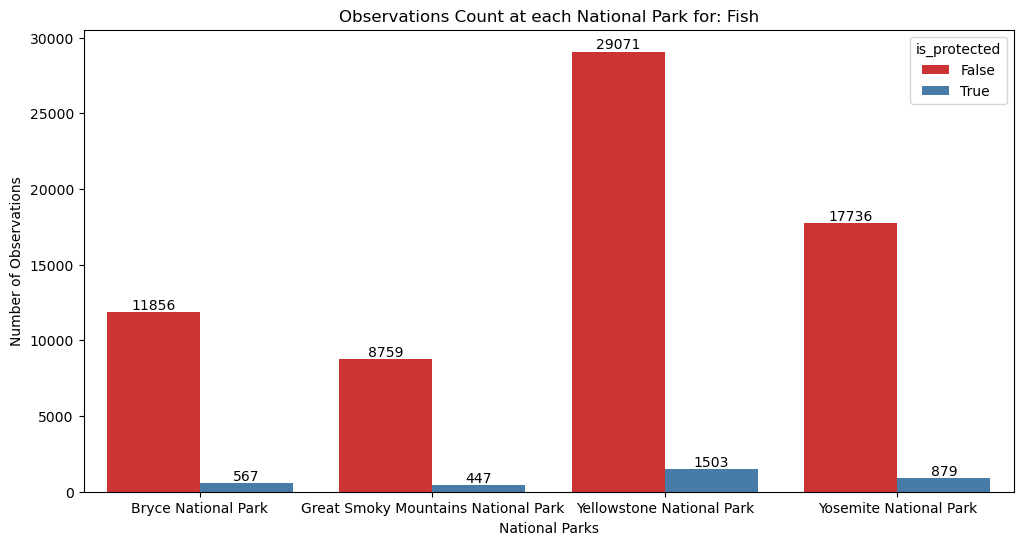

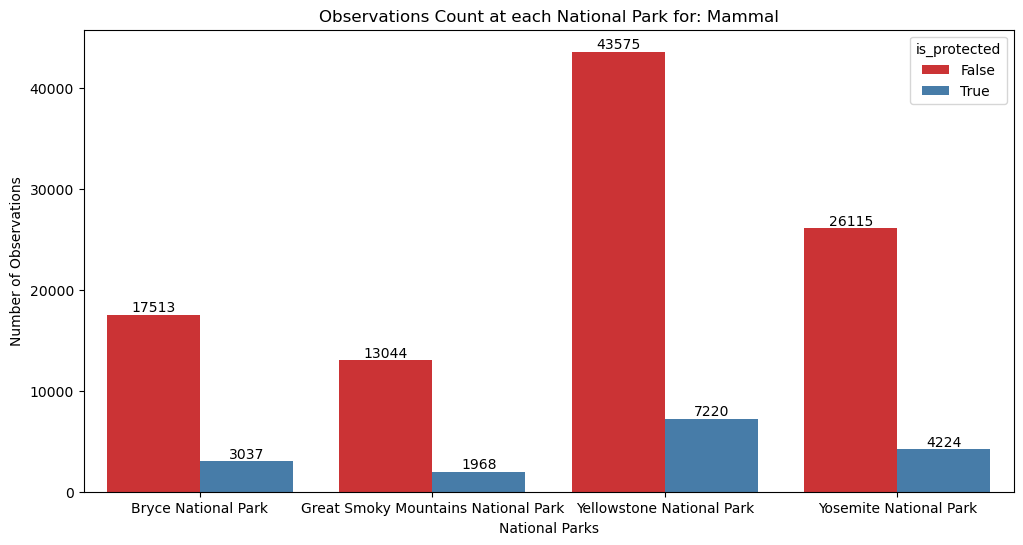

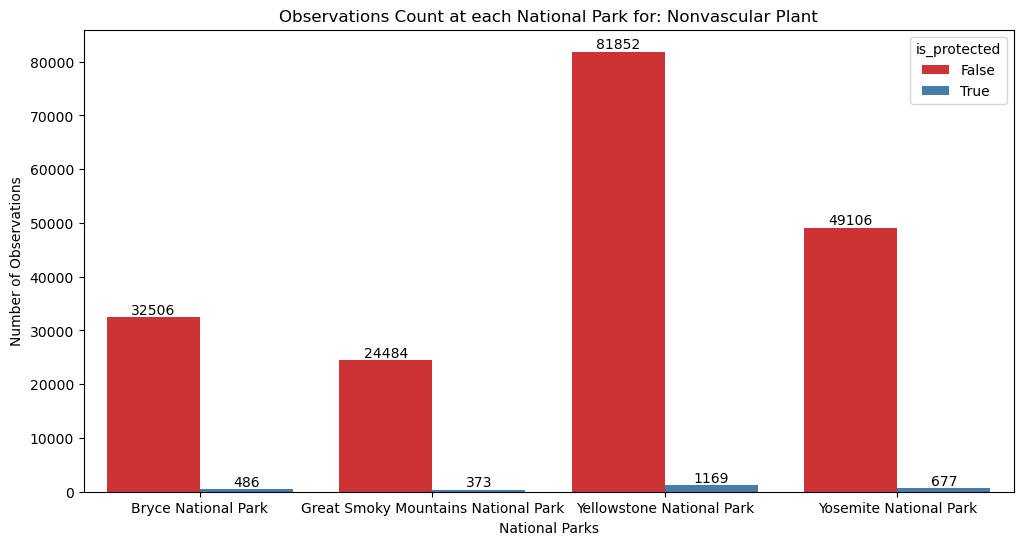

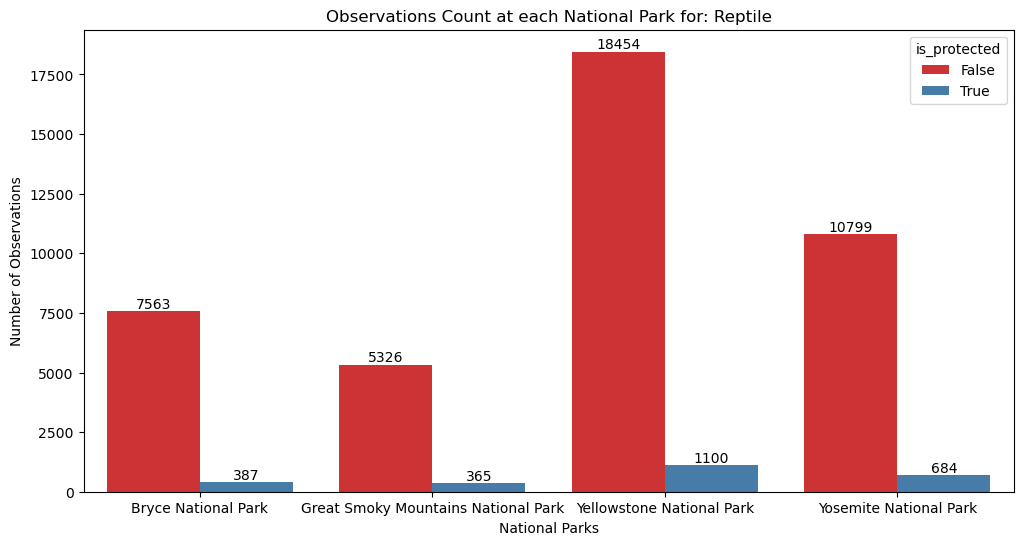

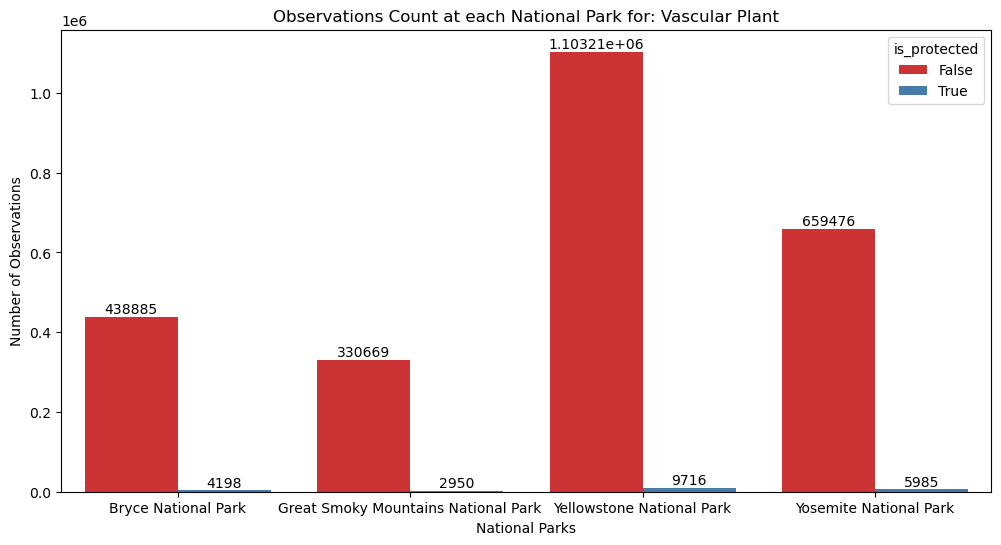

In [59]:
# list of all categories
list = count_per_park.category.explode().drop_duplicates().tolist()

#creating a for loop in order to plot all the categories with the protected status by park and their number of observations
for item in list:
    plt.figure(figsize=(12,6))
    ax = sns.barplot(data = count_per_park[count_per_park.category == item],
                 x='park_name',
                 y = "observations",
                 hue='is_protected',
                 palette='Set1',
                 errorbar=None)
    plt.title("Observations Count at each National Park for: " + item)
    
    # Add counts above each bar
    for container in ax.containers:
        ax.bar_label(container)
        
    plt.xlabel("National Parks")
    plt.ylabel("Number of Observations")
    plt.show()
    plt.close()



#### Insights:

The plots above show each category by their number of observations and their protected status. By making this overview there is no category with a greater number of observations for protected animals than non protected. This is an analysis that will need to be done in a much specific way in order to investigate deeper into the categoryies in order to get insights on whether there are more observations on protected species than non protected. 